# Biodiveristy - EDA

**Task:** Interpret data from the National Parks Service about endangered species in different parks.

Q.
* What is the distribution of _conservation_ _status_ for animals?
* Are certain types of species more likely to be endangered?
* Are the differences between species and their conservation status significant?
* Which species were spotted the most at each park?


#### Importing Libraries

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#### Reading data

In [69]:
df_spec = pd.read_csv("species_info.csv")
df_obs = pd.read_csv("observations.csv")

## Exploring datasets

### Species  

Dataset contains data about different species and their conservation status.

In [70]:
df_spec.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [71]:
# Null Values
df_spec.isnull().sum(axis = 0)

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

In [40]:
print("Columns")
df_spec.dtypes

Columns


category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object

In [39]:
print("Dataset contains", df_spec.shape[0],"observations.")

Dataset contains 5824 observations


In [58]:
print("Dataset contains",len(df_spec.scientific_name.unique()),"unique species scientific names.")

Dataset contains 5541 unique species


In [67]:
df_spec['num_common_names'] = df_spec.common_names.apply(lambda x: len(x.split(",")))

In [72]:
df_spec.head(3)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN


#### Visual exploration

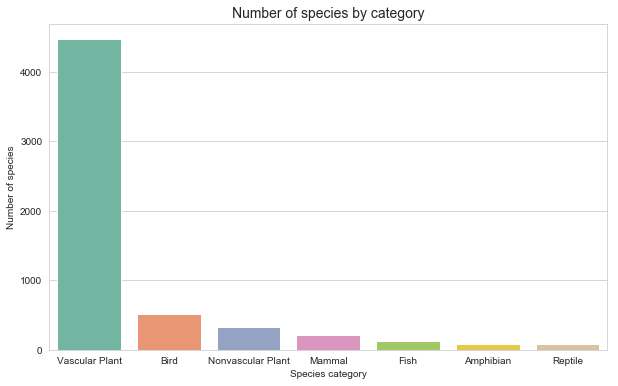

In [44]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
g = sns.countplot(x="category", data=df_spec, palette='Set2',order = df_spec['category'].value_counts().index)
plt.title("Number of species by category", fontsize=14)
plt.xlabel("Species category")
plt.ylabel("Number of species")
plt.show()

In [42]:
df_spec.conservation_status.value_counts()

Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64

In [122]:
plt_gr = df_spec.groupby(['conservation_status'])['scientific_name'].count().rename(columns={'scientific_name':'count'})

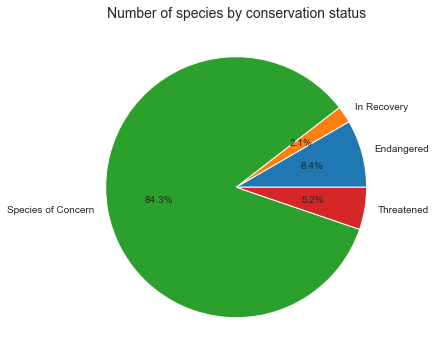

In [125]:
plt.figure(figsize=(6,6))
plt_gr.plot.pie(autopct="%.1f%%");
plt.title("Number of species by conservation status", fontsize=14)
plt.ylabel("")
plt.show()

In [131]:
df_end = df_spec[df_spec['conservation_status'].isnull()==False]
print(df_end.shape[0])

191


In [130]:
df_spec['in_conservation']=np.where(df_spec.conservation_status.isnull(), 0, 1)

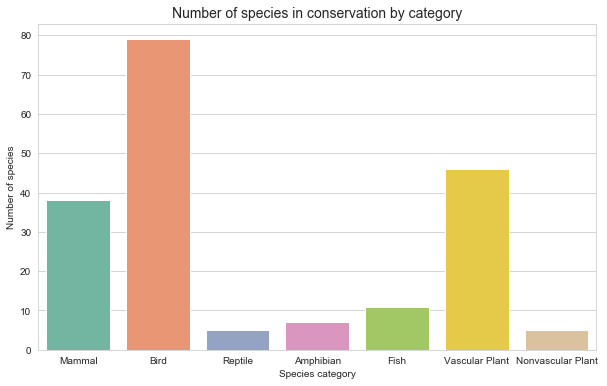

In [136]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
g = sns.countplot(x="category", data=df_spec[df_spec['in_conservation']==1], palette='Set2')
plt.title("Number of species in conservation by category", fontsize=14)
plt.xlabel("Species category")
plt.ylabel("Number of species")
plt.show()

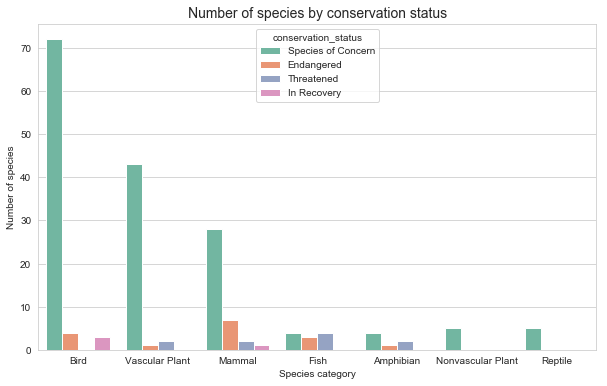

In [104]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
g = sns.countplot(x="category", data=df_end, hue="conservation_status", palette='Set2',order = df_end['category'].value_counts().index)
plt.title("Number of species by conservation status", fontsize=14)
plt.xlabel("Species category")
plt.ylabel("Number of species")
plt.show()

#### Findings

* Majority of species are of category Vascular Plants
* Number of species under protections: 191
* The most common type of status is _Species of concern_
* The most represented category in conservation are birds
* The most represented category in group _endangered_ are mammals, in _threatened_ fishes and bird in _species of concern_.

### Observations

Dataset holds recorded sightings of different species at several national parks for the past 7 days.

In [73]:
df_obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [9]:
df_obs.dtypes

scientific_name    object
park_name          object
observations        int64
dtype: object

In [10]:
df_obs.shape[0]

23296

In [139]:
print("Number of unique species in observations by scientific name:", len(df_obs.scientific_name.unique()))

Number of unique species in observations by scientific name: 5541


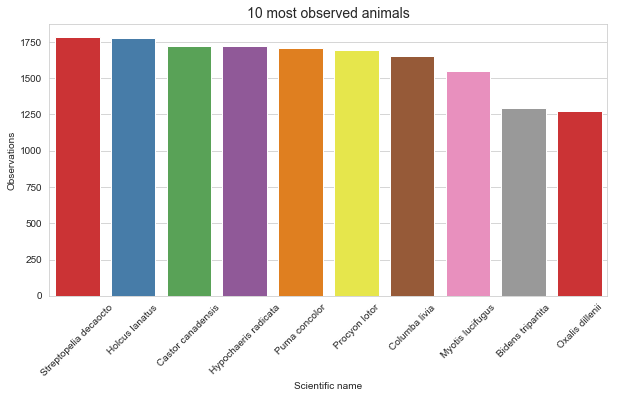

In [164]:
most_obs = df_obs.groupby(['scientific_name'])['observations'].sum().nlargest(10).reset_index()
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
g = sns.barplot(x="scientific_name", y="observations", data=most_obs, palette='Set1')
plt.xticks(rotation=45)
plt.xlabel("Scientific name")
plt.ylabel("Observations")
plt.title("10 most observed animals", fontsize=14)
plt.show()

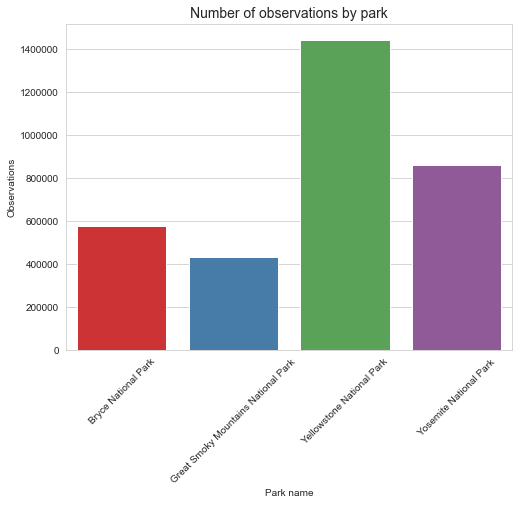

In [166]:
park_cnt = df_obs.groupby(['park_name'])['observations'].sum().reset_index()
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
g = sns.barplot(x="park_name", y="observations", data=park_cnt, palette='Set1')
plt.xticks(rotation=45)
plt.xlabel("Park name")
plt.ylabel("Observations")
plt.title("Number of observations by park", fontsize=14)
plt.show()

#### Joining Dataset

In [168]:
DF = df_obs.merge(df_spec,how="inner", on="scientific_name")
DF.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,in_conservation
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN,0
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN,0
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN,0
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN,0
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN,0


In [241]:
DF.groupby(['park_name'])['scientific_name'].nunique()

park_name
Bryce National Park                    5541
Great Smoky Mountains National Park    5541
Yellowstone National Park              5541
Yosemite National Park                 5541
Name: scientific_name, dtype: int64

In [175]:
cat_park_DF = DF.groupby(['park_name','category'])['observations'].sum().reset_index()

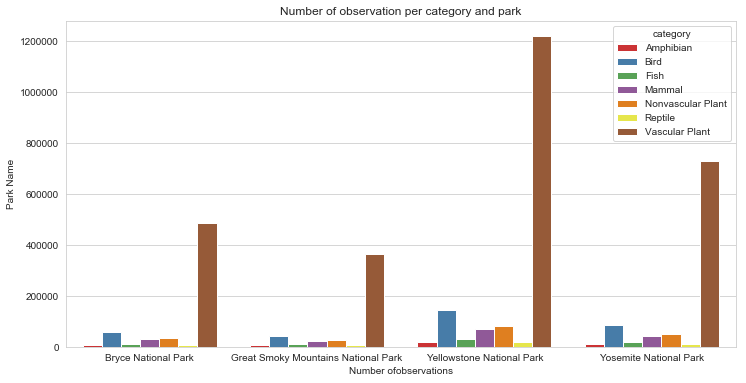

In [179]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
g = sns.barplot(x="park_name", y="observations",hue="category", data=cat_park_DF, palette='Set1')
plt.title("Number of observation per category and park")
plt.xlabel("Number ofobservations")
plt.ylabel("Park Name")
plt.show()

In [222]:
pivot_df = cat_park_DF.pivot(index='park_name', columns='category', values='observations')
pivot_df

pivot_df_ix = pivot_df.reset_index().set_index('park_name')
pivot_df_perc = pivot_df_ix.div(df.sum(axis=1), axis=0).reset_index()
pivot_df_perc

category,park_name,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
0,Bryce National Park,0.011909,0.092517,0.020248,0.045524,0.052096,0.012855,0.764851
1,Great Smoky Mountains National Park,0.012374,0.090277,0.019968,0.044341,0.052346,0.012300,0.768394
2,Yellowstone National Park,0.012558,0.090890,0.019815,0.044532,0.052292,0.012636,0.767278
3,Yosemite National Park,0.012337,0.091223,0.020156,0.044797,0.052433,0.012406,0.766647


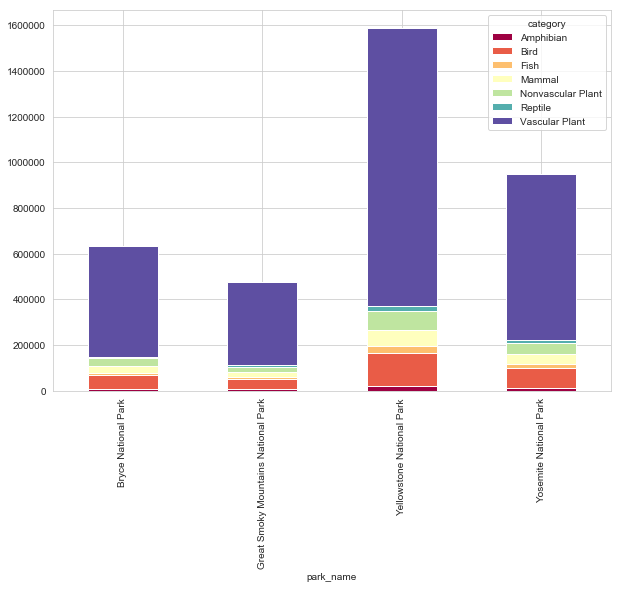

In [205]:
pivot_df.plot.bar(stacked=True,  figsize=(10,7),cmap="Spectral")

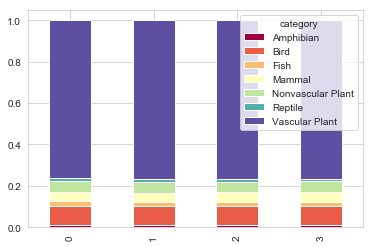

In [235]:
fig = plt.figure()
ax = fig.add_subplot(111)
pivot_df_perc.plot.bar(stacked=True, cmap="Spectral", ax=fig.gca())

#### Findings:

* Highest number of observations in Yellowstone National Park
* Same distribution of observation between parks
* Vascular plants mostly obsrevet in all parks